In [2]:
# Author       : AKASH DIXIT
# E-Mail       : akashdixit453@gmail.com
# Contact      : +91-7415770162
# Designation  : Robotics Engineer
# Regression Analysis for House Prices Prediction

# Import the Librearies and data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Since we are going to make lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [5]:
#Read the data
house = pd.read_csv('Maison.csv')

In [6]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transoformations & Analysis

In [7]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE':'area','CHAMBERS':'rooms',
                                            'SDB':'bathroom','ETAGES':'floor','ALLEE':'driveway',
                                             'SALLEJEU':'game_room','CAVE':'cellar','GAZ':'gas',
                                             'AIR':'air','GARAGES':'garage','SITUATION':'suitation'})

In [8]:
house.head()

,price,area,CHAMBRES,bathroom,floor,driveway,game_room,cellar,gas,air,garage,suitation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [9]:
house.shape

(546, 12)

In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 545
Data columns (total 12 columns):
price        546 non-null int64
area         546 non-null int64
CHAMBRES     546 non-null int64
bathroom     546 non-null int64
floor        546 non-null int64
driveway     546 non-null int64
game_room    546 non-null int64
cellar       546 non-null int64
gas          546 non-null int64
air          546 non-null int64
garage       546 non-null int64
suitation    546 non-null int64
dtypes: int64(12)
memory usage: 55.5+ KB


In [11]:
house_copy = house

In [12]:
house_copy.head(10)

,price,area,CHAMBRES,bathroom,floor,driveway,game_room,cellar,gas,air,garage,suitation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
5,66000,4160,3,1,1,1,1,1,0,1,0,0
6,66000,3880,3,2,2,1,0,1,0,0,2,0
7,69000,4160,3,1,3,1,0,0,0,0,0,0
8,83800,4800,3,1,1,1,1,1,0,0,0,0
9,88500,5500,3,2,4,1,1,0,0,1,1,0


In [13]:
print(house_copy['driveway'])

0      1
1      1
2      1
3      1
4      1
      ..
541    1
542    1
543    1
544    1
545    1
Name: driveway, Length: 546, dtype: int64


In [14]:
house_copy['garage'].unique()

array([1, 0, 2, 3])

In [15]:
house_copy.groupby('cellar').count()

,price,area,CHAMBRES,bathroom,floor,driveway,game_room,gas,air,garage,suitation
cellar,,,,,,,,,,,
0,355,355,355,355,355,355,355,355,355,355,355
1,191,191,191,191,191,191,191,191,191,191,191


In [16]:
house_copy.describe()

,price,area,CHAMBRES,bathroom,floor,driveway,game_room,cellar,gas,air,garage,suitation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


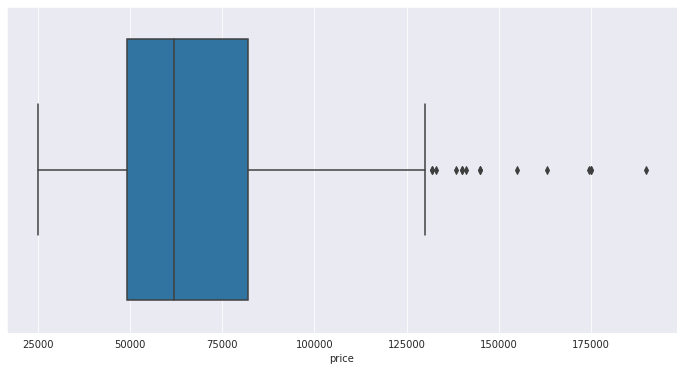

In [17]:
sns.boxplot(house_copy['price'])

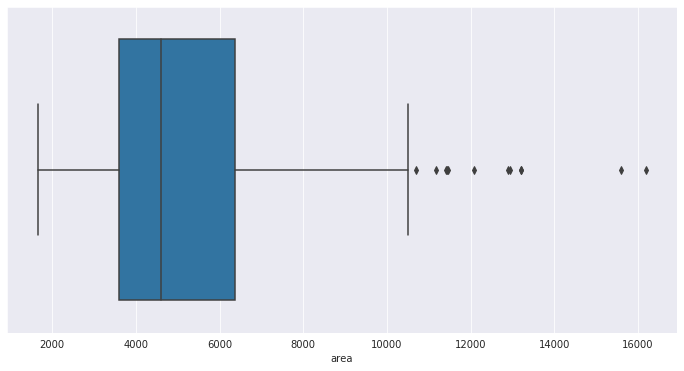

In [18]:
sns.boxplot(house_copy['area'])    

In [19]:
#Remove outlier from area column
q1 = house_copy['area'].quantile(0.25)
q3 = house_copy['area'].quantile(0.75)
IQR = q3-q1
print("q1:", q1)
print("q3:", q3)
print("IQR:", IQR)

lower_whisker = q1-1.5*IQR
uppar_whisker = q3+1.5*IQR

print("Lower_whisker: ",lower_whisker)
print("Uppar_wishker: ",uppar_whisker)

house_filter_data = house_copy[house_copy['area'] < uppar_whisker]


q1: 3600.0
q3: 6360.0
IQR: 2760.0
Lower_whisker:  -540.0
Uppar_wishker:  10500.0


In [20]:
house_filter_data.shape

(531, 12)

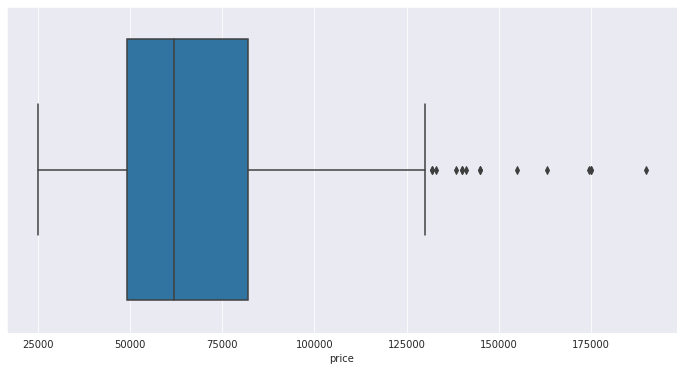

In [21]:
sns.boxplot(house_copy['price'])    

In [22]:
house_filter_data.shape

(531, 12)

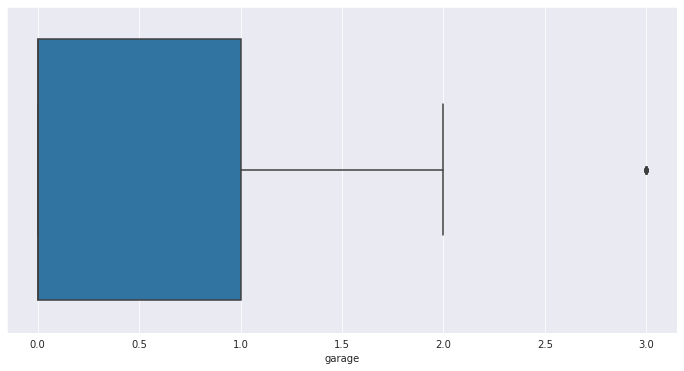

In [23]:
sns.boxplot(house_copy['garage'])

In [24]:
#Remove outlier from garage column
q1 = house_copy['garage'].quantile(0.25)
q3 = house_copy['garage'].quantile(0.75)
IQR = q3-q1
print("q1:", q1)
print("q3:", q3)
print("IQR:", IQR)

lower_whisker = q1-1.5*IQR
uppar_whisker = q3+1.5*IQR

print("Lower_whisker: ",lower_whisker)
print("Uppar_wishker: ",uppar_whisker)

house_filter_data = house_copy[house_copy['garage'] < uppar_whisker]


q1: 0.0
q3: 1.0
IQR: 1.0
Lower_whisker:  -1.5
Uppar_wishker:  2.5


In [25]:
house_copy.head()

,price,area,CHAMBRES,bathroom,floor,driveway,game_room,cellar,gas,air,garage,suitation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [26]:
house_data_new = house.copy()

In [27]:
house_data_new.head()

,price,area,CHAMBRES,bathroom,floor,driveway,game_room,cellar,gas,air,garage,suitation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


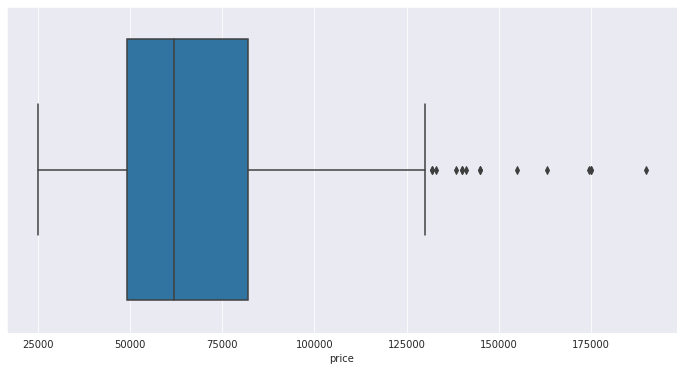

In [28]:
sns.boxplot(house_data_new['price'])    

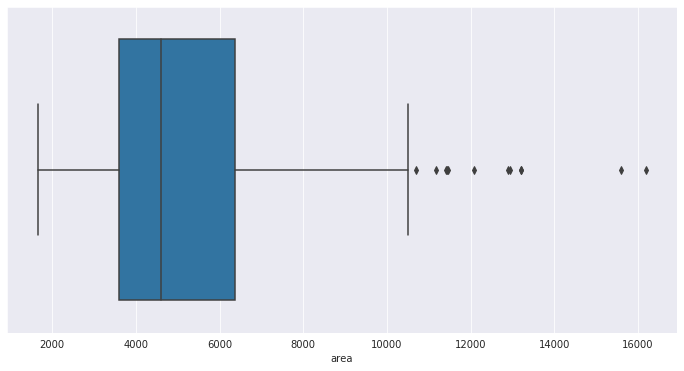

In [29]:
sns.boxplot(house_data_new['area'])    

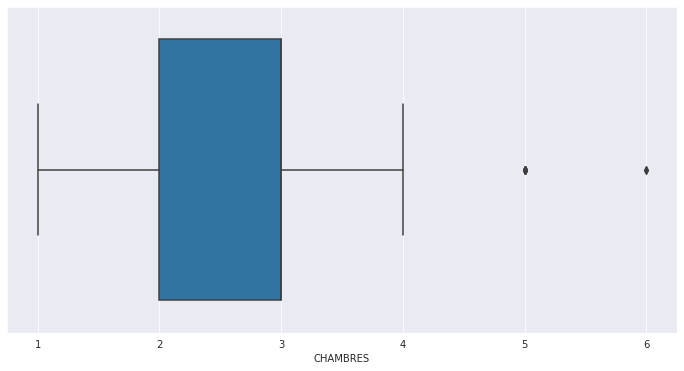

In [30]:
sns.boxplot(house_data_new['CHAMBRES'])    

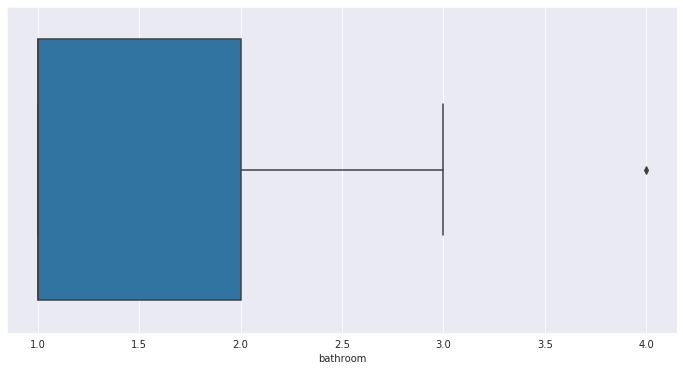

In [31]:
sns.boxplot(house_data_new['bathroom'])    

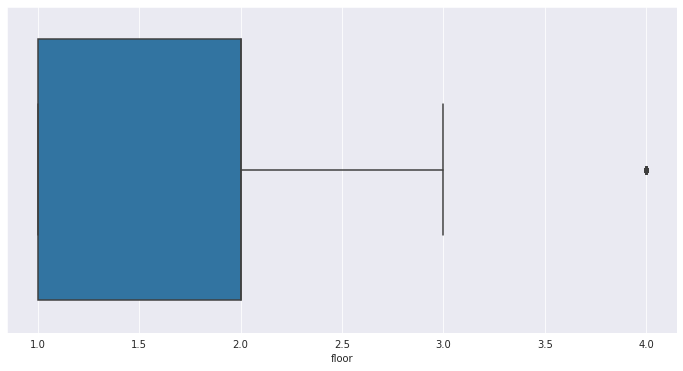

In [32]:
sns.boxplot(house_data_new['floor'])    

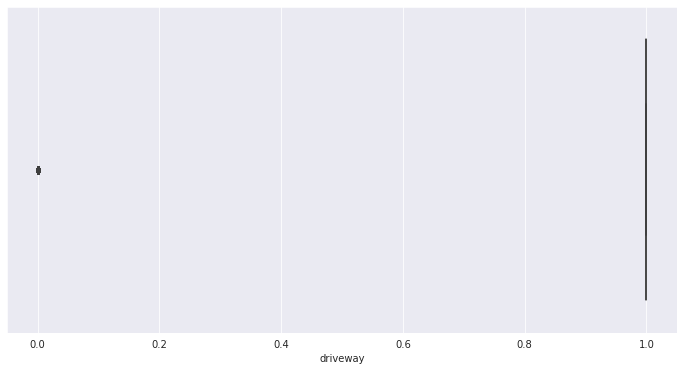

In [33]:
sns.boxplot(house_data_new['driveway'])    

In [34]:
house_data_new = house_data_new.drop(columns = ['driveway'])

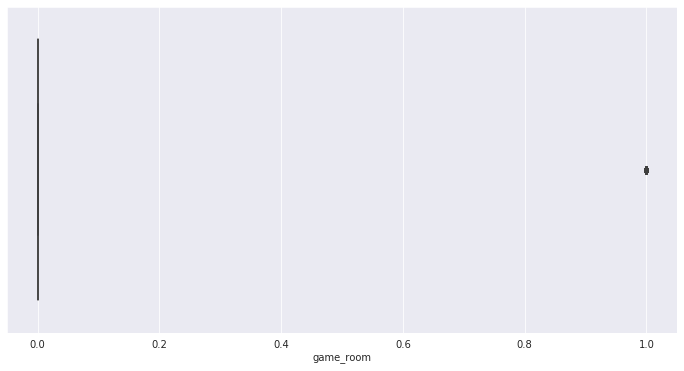

In [35]:
sns.boxplot(house_data_new['game_room'])    

In [36]:
house_data_new = house_data_new.drop(columns = ['game_room'])

In [37]:
house_data_new.head()

,price,area,CHAMBRES,bathroom,floor,cellar,gas,air,garage,suitation
0,42000,5850,3,1,2,1,0,0,1,0
1,38500,4000,2,1,1,0,0,0,0,0
2,49500,3060,3,1,1,0,0,0,0,0
3,60500,6650,3,1,2,0,0,0,0,0
4,61000,6360,2,1,1,0,0,0,0,0


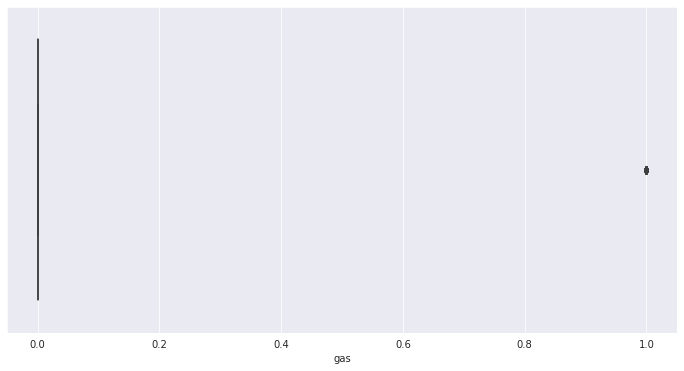

In [38]:
sns.boxplot(house_data_new['gas'])    

In [39]:
house_data_new = house_data_new.drop(columns = ['gas'])

In [40]:
house_data_new.head()

,price,area,CHAMBRES,bathroom,floor,cellar,air,garage,suitation
0,42000,5850,3,1,2,1,0,1,0
1,38500,4000,2,1,1,0,0,0,0
2,49500,3060,3,1,1,0,0,0,0
3,60500,6650,3,1,2,0,0,0,0
4,61000,6360,2,1,1,0,0,0,0


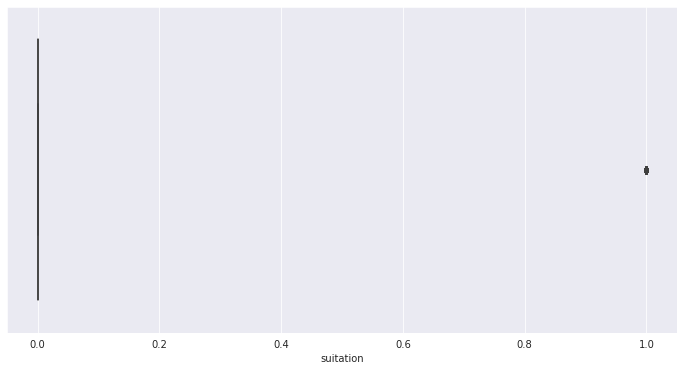

In [41]:
sns.boxplot(house_data_new['suitation'])    

In [42]:
house_data_new = house_data_new.drop(columns = ['suitation'])

In [43]:
house_data_new.head()

,price,area,CHAMBRES,bathroom,floor,cellar,air,garage
0,42000,5850,3,1,2,1,0,1
1,38500,4000,2,1,1,0,0,0
2,49500,3060,3,1,1,0,0,0
3,60500,6650,3,1,2,0,0,0
4,61000,6360,2,1,1,0,0,0


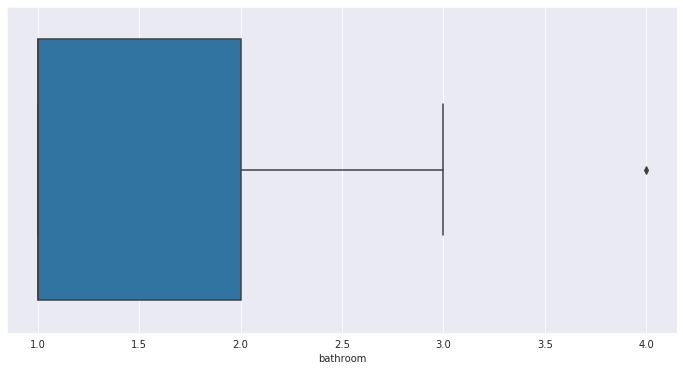

In [44]:
sns.boxplot(house_data_new['bathroom'])    

In [45]:
house_data_new.head()

,price,area,CHAMBRES,bathroom,floor,cellar,air,garage
0,42000,5850,3,1,2,1,0,1
1,38500,4000,2,1,1,0,0,0
2,49500,3060,3,1,1,0,0,0
3,60500,6650,3,1,2,0,0,0
4,61000,6360,2,1,1,0,0,0


In [46]:
house_data_new['cellar'].count()


546

In [47]:
house_data_new['cellar'].sum()

191

In [48]:
house_data_new.shape

(546, 8)

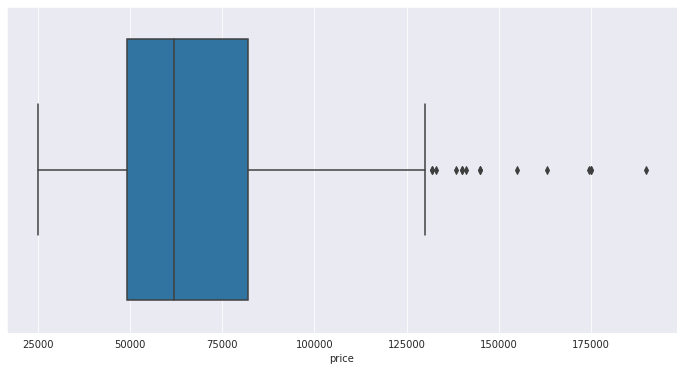

In [49]:
sns.boxplot(house_data_new['price'])    

In [50]:
house_data_new.shape

(546, 8)

In [51]:
#Remove outlier from price column
q1 = house_data_new['price'].quantile(0.25)
q3 = house_data_new['price'].quantile(0.75)
IQR = q3-q1
print("q1:", q1)
print("q3:", q3)
print("IQR:", IQR)

lower_whisker = q1-1.5*IQR
uppar_whisker = q3+1.5*IQR

print("Lower_whisker: ",lower_whisker)
print("Uppar_wishker: ",uppar_whisker)



q1: 49125.0
q3: 82000.0
IQR: 32875.0
Lower_whisker:  -187.5
Uppar_wishker:  131312.5


In [52]:
house_data_new = house_data_new[house_data_new['price'] < uppar_whisker]

In [53]:
house_data_new.shape

(531, 8)

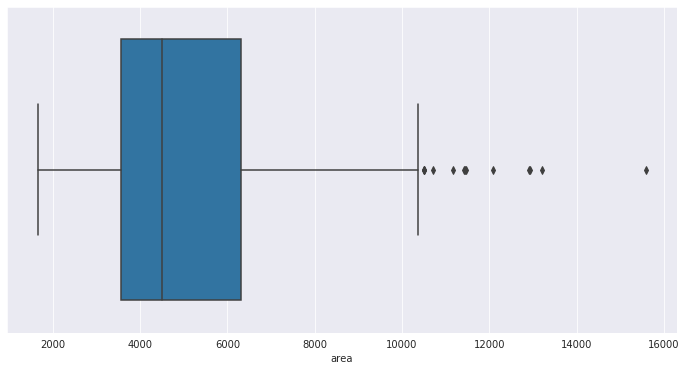

In [54]:
sns.boxplot(house_data_new['area'])    

In [55]:
#Remove outlier from area column
q1 = house_data_new['area'].quantile(0.25)
q3 = house_data_new['area'].quantile(0.75)
IQR = q3-q1
print("q1:", q1)
print("q3:", q3)
print("IQR:", IQR)

lower_whisker = q1-1.5*IQR
uppar_whisker = q3+1.5*IQR

print("Lower_whisker: ",lower_whisker)
print("Uppar_wishker: ",uppar_whisker)


q1: 3555.0
q3: 6310.5
IQR: 2755.5
Lower_whisker:  -578.25
Uppar_wishker:  10443.75


In [56]:
house_data_new = house_data_new[house_data_new['area'] < uppar_whisker]

In [57]:
house_data_new.shape

(518, 8)

In [58]:
house_data_new.head()

,price,area,CHAMBRES,bathroom,floor,cellar,air,garage
0,42000,5850,3,1,2,1,0,1
1,38500,4000,2,1,1,0,0,0
2,49500,3060,3,1,1,0,0,0
3,60500,6650,3,1,2,0,0,0
4,61000,6360,2,1,1,0,0,0


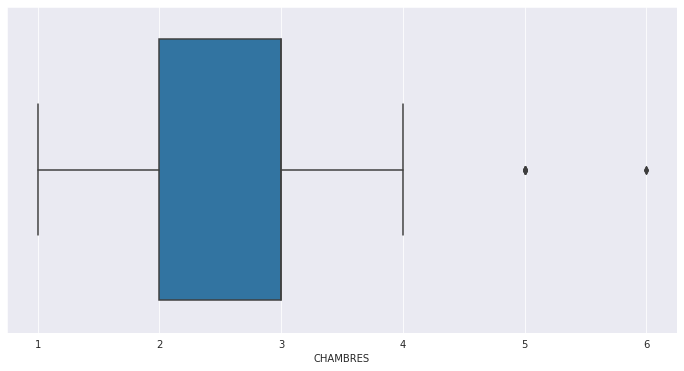

In [59]:
sns.boxplot(house_data_new['CHAMBRES'])    

In [60]:
#Remove outlier from CHAMBRES column
q1 = house_data_new['CHAMBRES'].quantile(0.25)
q3 = house_data_new['CHAMBRES'].quantile(0.75)
IQR = q3-q1
print("q1:", q1)
print("q3:", q3)
print("IQR:", IQR)

lower_whisker = q1-1.5*IQR
uppar_whisker = q3+1.5*IQR

print("Lower_whisker: ",lower_whisker)
print("Uppar_wishker: ",uppar_whisker)

q1: 2.0
q3: 3.0
IQR: 1.0
Lower_whisker:  0.5
Uppar_wishker:  4.5


In [61]:
house_data_new = house_data_new[house_data_new['CHAMBRES'] < uppar_whisker]

In [62]:
house_data_new.shape

(507, 8)

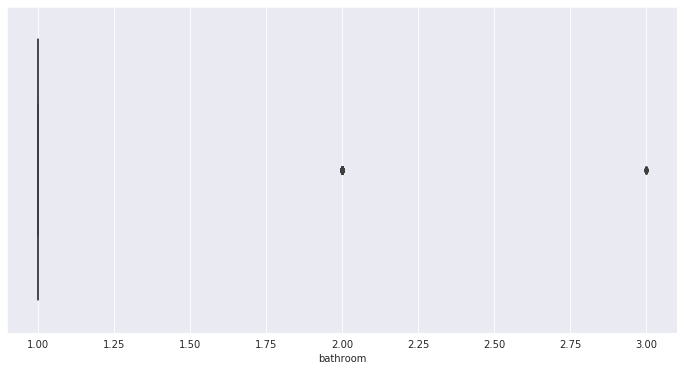

In [63]:
sns.boxplot(house_data_new['bathroom'])    

In [64]:
house_data_new.head()

,price,area,CHAMBRES,bathroom,floor,cellar,air,garage
0,42000,5850,3,1,2,1,0,1
1,38500,4000,2,1,1,0,0,0
2,49500,3060,3,1,1,0,0,0
3,60500,6650,3,1,2,0,0,0
4,61000,6360,2,1,1,0,0,0


In [65]:
house_data_new = house_data_new.drop(columns = ['bathroom'])

In [66]:
house_data_new.head()

,price,area,CHAMBRES,floor,cellar,air,garage
0,42000,5850,3,2,1,0,1
1,38500,4000,2,1,0,0,0
2,49500,3060,3,1,0,0,0
3,60500,6650,3,2,0,0,0
4,61000,6360,2,1,0,0,0


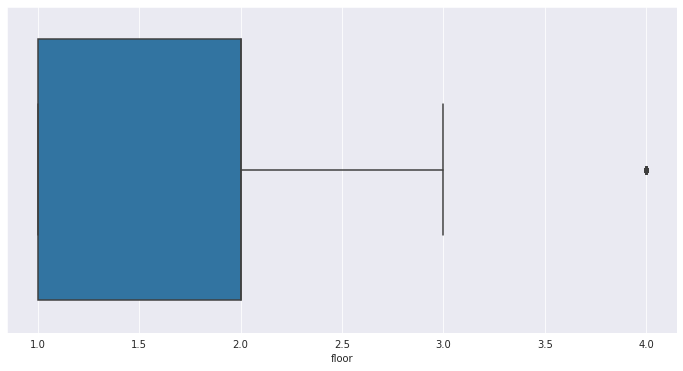

In [67]:
sns.boxplot(house_data_new['floor'])    

In [68]:
#Remove outlier from floor column
q1 = house_data_new['floor'].quantile(0.25)
q3 = house_data_new['floor'].quantile(0.75)
IQR = q3-q1
print("q1:", q1)
print("q3:", q3)
print("IQR:", IQR)

lower_whisker = q1-1.5*IQR
uppar_whisker = q3+1.5*IQR

print("Lower_whisker: ",lower_whisker)
print("Uppar_wishker: ",uppar_whisker)

q1: 1.0
q3: 2.0
IQR: 1.0
Lower_whisker:  -0.5
Uppar_wishker:  3.5


In [69]:
house_data_new = house_data_new[house_data_new['floor'] < uppar_whisker]

In [70]:
house_data_new.head()

,price,area,CHAMBRES,floor,cellar,air,garage
0,42000,5850,3,2,1,0,1
1,38500,4000,2,1,0,0,0
2,49500,3060,3,1,0,0,0
3,60500,6650,3,2,0,0,0
4,61000,6360,2,1,0,0,0


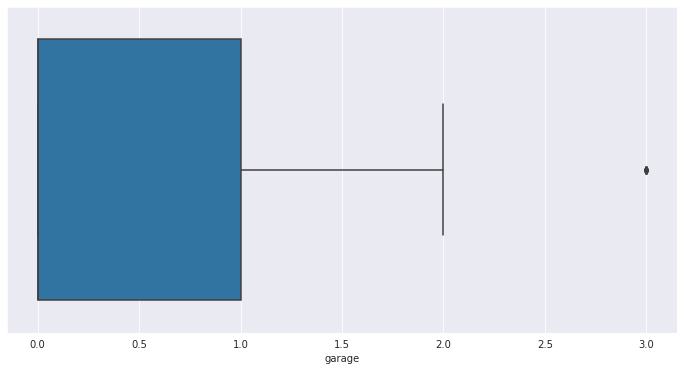

In [71]:
sns.boxplot(house_data_new['garage'])    

In [72]:
#Remove outlier from garage column
q1 = house_data_new['garage'].quantile(0.25)
q3 = house_data_new['garage'].quantile(0.75)
IQR = q3-q1
print("q1:", q1)
print("q3:", q3)
print("IQR:", IQR)

lower_whisker = q1-1.5*IQR
uppar_whisker = q3+1.5*IQR

print("Lower_whisker: ",lower_whisker)
print("Uppar_wishker: ",uppar_whisker)

q1: 0.0
q3: 1.0
IQR: 1.0
Lower_whisker:  -1.5
Uppar_wishker:  2.5


In [73]:
house_data_new = house_data_new[house_data_new['garage'] < uppar_whisker]

In [74]:
house_data_new.head()


,price,area,CHAMBRES,floor,cellar,air,garage
0,42000,5850,3,2,1,0,1
1,38500,4000,2,1,0,0,0
2,49500,3060,3,1,0,0,0
3,60500,6650,3,2,0,0,0
4,61000,6360,2,1,0,0,0


In [75]:
house_data_new.shape

(461, 7)

In [76]:
house_data_new['air'].count()

461

In [77]:
house_data_new['air'].sum()

125

In [78]:
house_data_new.head()

,price,area,CHAMBRES,floor,cellar,air,garage
0,42000,5850,3,2,1,0,1
1,38500,4000,2,1,0,0,0
2,49500,3060,3,1,0,0,0
3,60500,6650,3,2,0,0,0
4,61000,6360,2,1,0,0,0


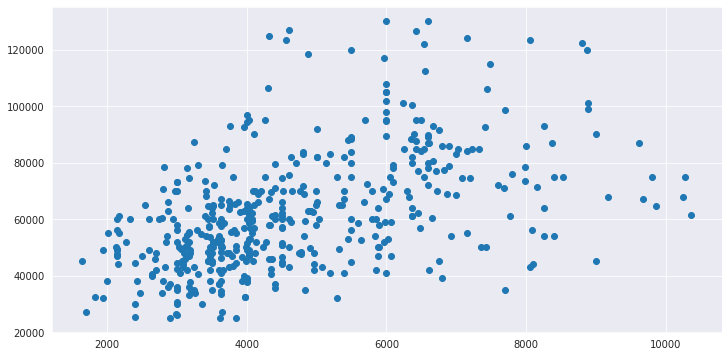

In [79]:
#Let's draw scatter plot between area & price
plt.scatter(house_data_new['area'], house_data_new['price'])
plt.show()

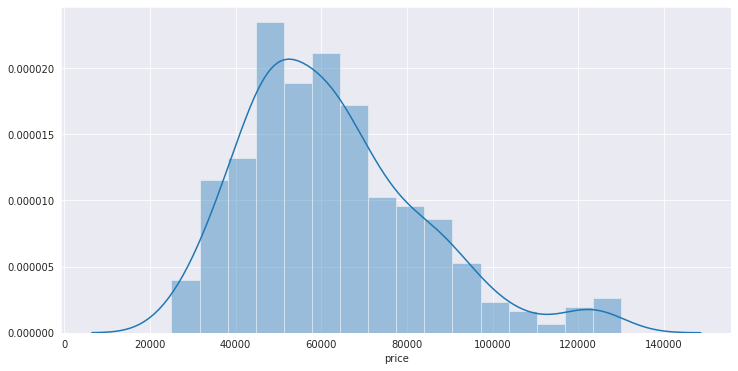

In [80]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house_data_new['price'])
plt.show()

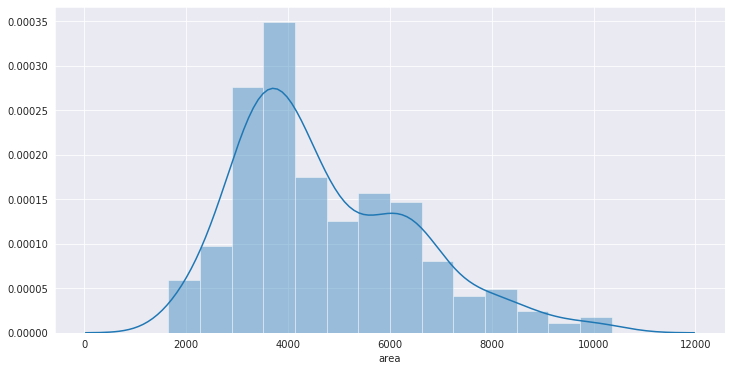

In [81]:
sns.distplot(house_data_new['area'])
plt.show()

In [82]:
#Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [83]:
#we now instatiate a Linear Regression object
lm = LinearRegression()

In [84]:
# let's do the split of the dataset
house_data_new.columns

X = house_data_new[['area', 'CHAMBRES', 'floor', 'cellar', 'air', 'garage']]

Y = house_data_new['price']

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 56)


In [86]:
X_test.head()

,area,CHAMBRES,floor,cellar,air,garage
483,4000,2,1,0,0,0
345,3850,3,1,0,0,0
539,7320,4,2,0,0,0
262,3640,2,1,0,0,0
249,3450,3,2,1,0,0


In [87]:
#Now let's build the model using sklearn
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
predictions = lm.predict(X_test)

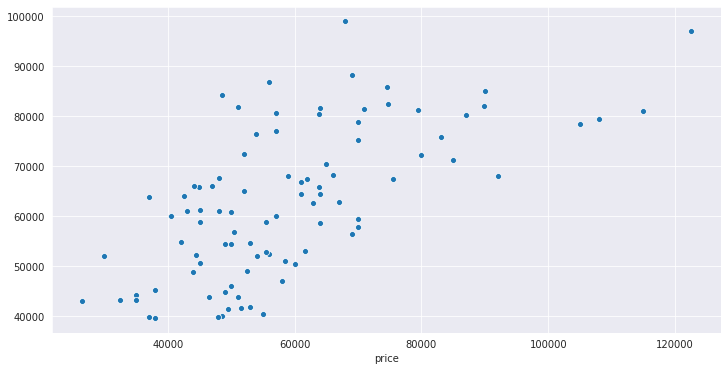

In [89]:
sns.scatterplot(Y_test, predictions)

In [90]:
print("Accuracy --> ", lm.score(X_test, Y_test)*100)

Accuracy -->  34.22430165996083


In [91]:
import statsmodels.api as sm

In [92]:
X_endog = sm.add_constant(X_test)

In [93]:
res = sm.OLS(Y_test, X_endog)
res.fit()

In [94]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     14.59
Date:                Sat, 27 Jun 2020   Prob (F-statistic):           2.03e-11
Time:                        12:41:51   Log-Likelihood:                -1010.0
No. Observations:                  93   AIC:                             2034.
Df Residuals:                      86   BIC:                             2052.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.39e+04   6859.507      2.026      0.046     263.538    2.75e+04
area           5.2621      0.867      6.066      0.000       3.538       6.987
CHAMBRES    1033.1854   2253.376      0.459      0.648   -3446.378    5512.749
floor       8635.7538   2649.312      3.260      0.002    3369.095    1.39e+04
cellar      2378.2905   2972.068      0.800      0.426   -3529.985    8286.566
air         1.005e+04   3358.531      2.993      0.004    3376.222    1.67e+04
garage       668.8828   1763.185      0.379      0.705   -2836.213    4173.978
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.344
Skew:                           0.121   Prob(JB):                        0.842
Kurtosis:                       2.826   Cond. No.                     2.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
#correlation
train_corr = house_data_new.select_dtypes(include=[np.number])

In [106]:
train_corr.shape

(461, 7)

             price      area  CHAMBRES     floor    cellar       air    garage
price     1.000000  0.503179  0.339083  0.241886  0.286965  0.413291  0.324114
area      0.503179  1.000000  0.101528 -0.091358  0.080814  0.234586  0.293147
CHAMBRES  0.339083  0.101528  1.000000  0.467172  0.136908  0.155364  0.095814
floor     0.241886 -0.091358  0.467172  1.000000 -0.083226  0.150820 -0.070506
cellar    0.286965  0.080814  0.136908 -0.083226  1.000000  0.078352  0.072949
air       0.413291  0.234586  0.155364  0.150820  0.078352  1.000000  0.119761
garage    0.324114  0.293147  0.095814 -0.070506  0.072949  0.119761  1.000000


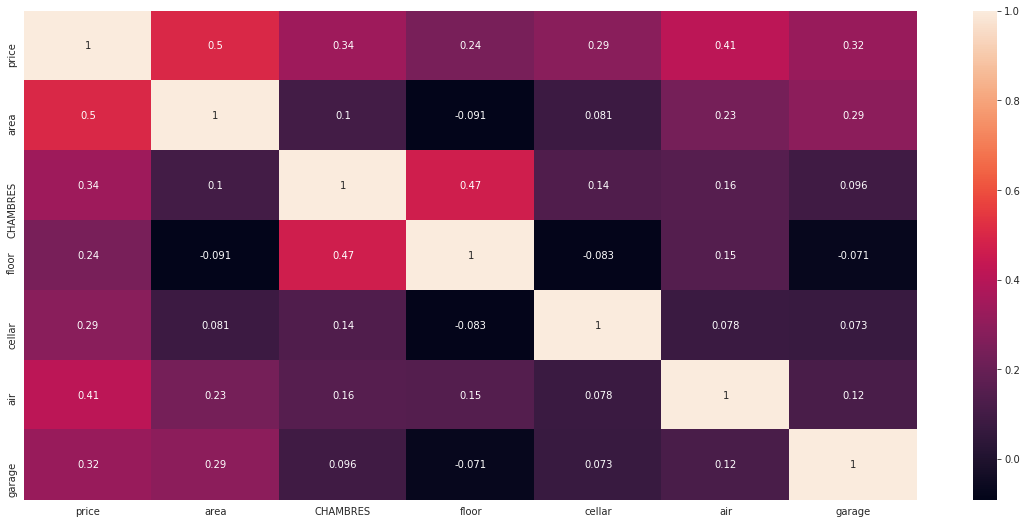

In [107]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)
print(corr)

In [110]:
house_data_new.area.unique()

array([ 5850,  4000,  3060,  6650,  6360,  4160,  3880,  4800,  3000,
        1700,  2880,  3600,  3185,  3300,  5200,  3450,  3986,  4785,
        4510,  3934,  4960,  3800,  4500,  3500,  4032,  5400,  3150,
        3745,  4520,  4640,  2000,  2160,  3040,  3090,  3350,  4100,
        9166,  4040,  3630,  3620,  2400,  4400,  4120,  4750,  4280,
        4820,  5500,  5040,  6000,  2500,  4095,  1836,  2475,  3210,
        3180,  1650,  4240,  3240,  3650,  3780,  6480,  6060,  5900,
        8050,  6800,  8250,  2835,  4320,  4992,  4600,  3720,  3680,
        3750,  5076,  5000,  4260,  6540,  3700,  3760,  4300,  4840,
        5960,  8800,  4560,  3850,  4900,  4370,  7700,  2990,  2650,
        2175,  2610,  2953,  2747,  3968,  3162,  2910,  2135,  3120,
        4075,  3410,  2800,  2684,  3100,  1950,  2430,  3036,  3420,
        3660,  4410,  3990,  4340,  3510,  5495,  3480,  7424,  3460,
        3635,  3960,  4350,  3930,  3570,  3290,  2325,  3540,  2640,
        2700,  3792,

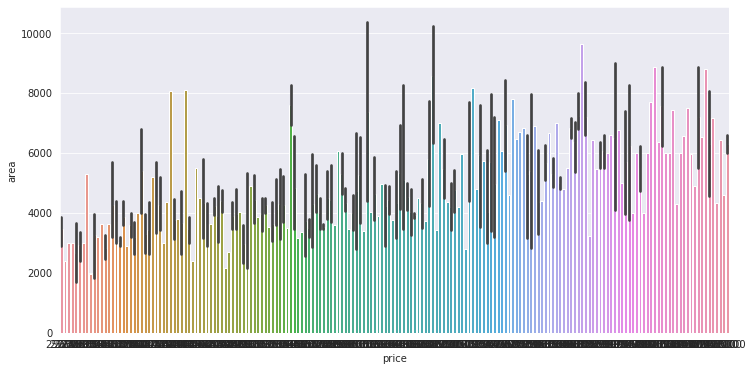

In [111]:
sns.barplot(house_data_new.price, house_data_new.area)

In [117]:
house_data_new = house_data_new.drop(columns = ['cellar'])


In [118]:
house_data_new.head()

,price,area,CHAMBRES,air
0,42000,5850,3,0
1,38500,4000,2,0
2,49500,3060,3,0
3,60500,6650,3,0
4,61000,6360,2,0


In [119]:
house_data_new.shape

(461, 4)

In [120]:
#we now instatiate a Linear Regression object
lm = LinearRegression()

In [127]:
# let's do the split of the dataset
house_data_new.columns

X = house_data_new[['area', 'CHAMBRES', 'air']]

Y = house_data_new['price']

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [193]:
#Now let's build the model using sklearn
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
predictions = lm.predict(X_test)

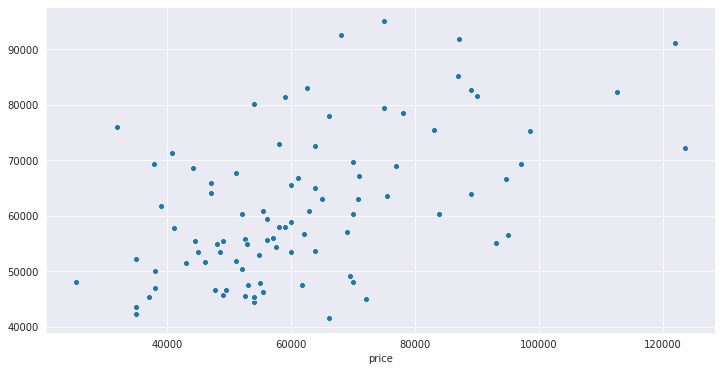

In [195]:
sns.scatterplot(Y_test, predictions)

In [197]:
print("Accuracy --> ", lm.score(X_train, Y_train)*100)

Accuracy -->  43.828537775082296
